<a href="https://colab.research.google.com/github/samdandy/ai-ml-course-proj-2/blob/main/AIML_ML_Project_Full_Code_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a mid-sized, fast-growing US-based financial institution that offers a range of retail banking services, including savings and checking accounts, fixed deposits, and personal loans. The bank’s business model is centered on building long-term customer relationships, expanding its retail footprint, and growing its loan portfolio to drive sustainable profitability through interest income.

It currently relies on a large base of liability customers (depositors) but faces a significant under-representation of asset customers (borrowers). To drive profitability through interest income, the bank must aggressively expand its loan portfolio by converting existing depositors into personal loan customers.

Last year’s pilot campaign achieved a 9% conversion rate, validating the potential of this strategy. However, to optimize marketing spend and improve efficiency, the retail marketing department requires a more data-driven approach. Enhancing the success ratio of these campaigns is critical for sustainable growth and maximizing customer lifetime value.

### Objective

The objective is to develop a predictive classification model that identifies patterns and key factors driving personal loan adoption among existing liability customers. By uncovering the demographic and behavioral drivers of loan conversion, the goal is to enable targeted segmentation and more precise marketing interventions that improve campaign conversion rates, optimize marketing spend, and enhance overall profitability through higher-quality loan portfolio growth.

### Data Dictionary

* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


sns.set()
# to split the data into train and test
from sklearn.model_selection import train_test_split
# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE
# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [21]:
file_name = "Loan_Modelling.csv"
data = pd.read_csv(file_name)
loan_data = data.copy()

## Data Overview

* Observations
* Sanity checks

In [24]:
loan_data.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [23]:
rows, cols = loan_data.shape
print(f"there are {rows} rows")
print(f"there are {cols} columns")

there are 5000 rows
there are 14 columns


In [22]:
loan_data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [43]:
null_loans = loan_data.isnull().sum()
na_loans = loan_data.isna().sum()
print(f"There are {loan_data.duplicated().sum()} dupes")
print(null_loans)
print(na_loans)
if 'ID' in loan_data.columns:
  loan_data = loan_data.drop(columns=['ID'])
loan_data
# data looks good to go

There are 0 dupes
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## Exploratory Data Analysis.

EDA is a critical step in any data project used to investigate and understand the data before model construction.

The following questions serve as a starting point to help you approach the analysis and generate initial insights:

**Questions**:
1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their education?
5. How does a customer's interest in purchasing a loan vary with their age?

**[IMPORTANT]** Beyond the Basics: Please note that these are guiding questions only. To receive full points for this rubric section, you are expected to perform a thorough analysis that goes beyond these specific questions to uncover deeper trends and relationships within the data.

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


<Axes: xlabel='CreditCard', ylabel='Count'>

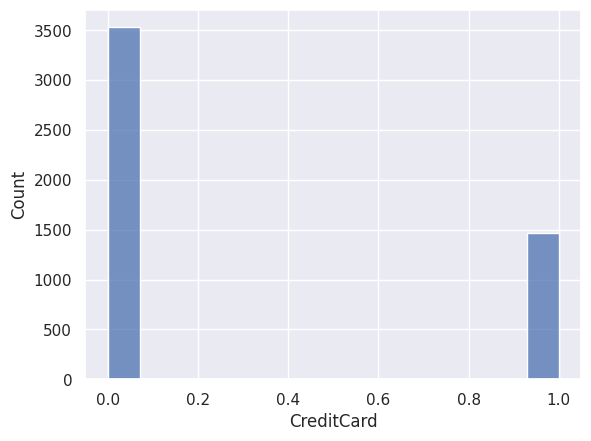

In [93]:

print(loan_data.columns)

# Normal Distribution
# sns.boxplot(data=loan_data,x='Age')
# sns.boxplot(data=loan_data,x='Experience')
# sns.histplot(data=loan_data,x='Education')
# sns.histplot(data=loan_data,x='Family')
# sns.histplot(data=loan_data,x='CCAvg')

#  right skewed
# sns.histplot(data=loan_data,x='CCAvg')
# sns.boxplot(data=loan_data,x='Income')
# sns.histplot(data=loan_data,x='Mortgage')
# sns.histplot(data=loan_data,x='CreditCard')

0.69% applicants do not have a mortgage


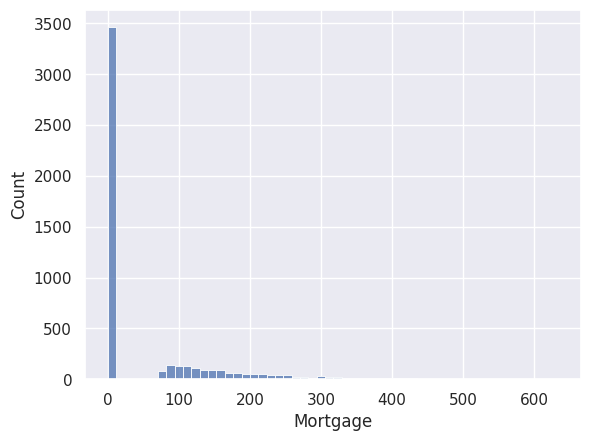

In [86]:
sns.histplot(data=loan_data,x='Mortgage')
# Mortgage is right skewed distribution
no_mortgage_count = loan_data['Mortgage'].value_counts().get(0, 0)
perc_no_mortgage = no_mortgage_count / loan_data.shape[0]
print(f"{perc_no_mortgage.round(2)}% applicants do not have a mortgage")
# Most loan applicants do not have a mortgage

In [101]:
has_cc_count = loan_data['CreditCard'].value_counts().get(1, 1)
print(f"{has_cc_count} customers have a credit card. {(has_cc_count/loan_data.shape[0]).round(2)}% Of all customers")

1470 customers have a credit card. 0.29% Of all customers


<Axes: >

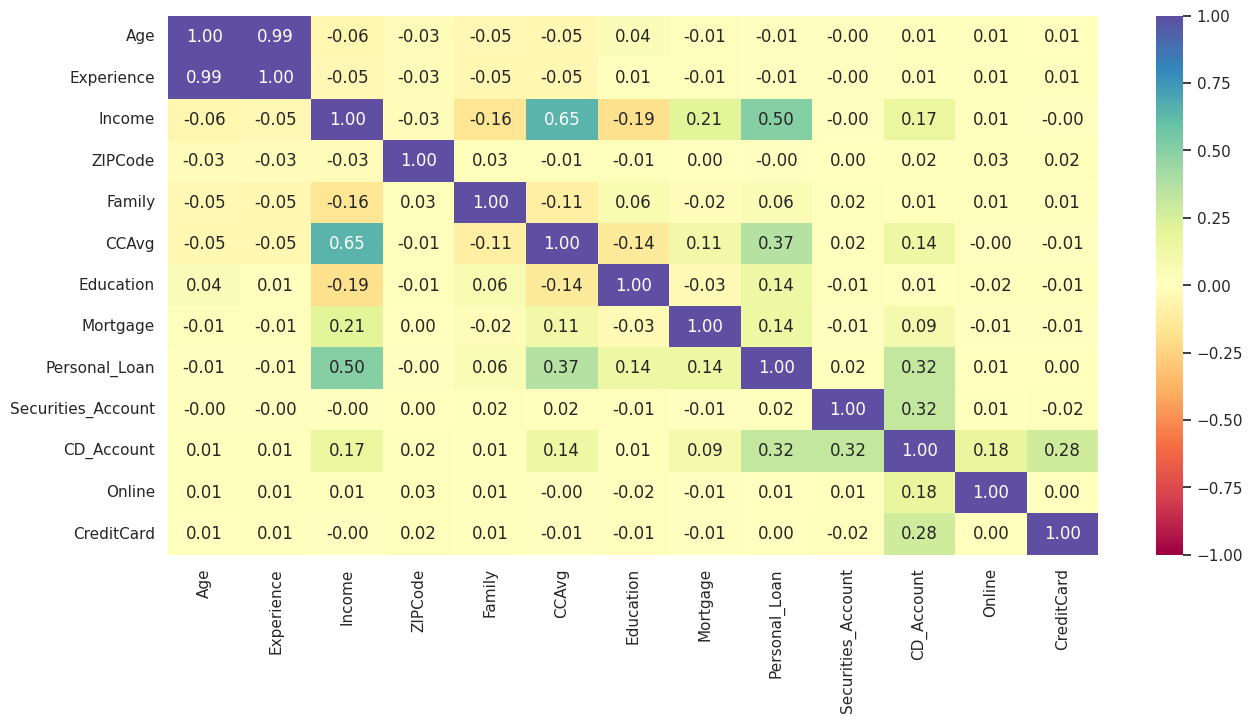

In [104]:
num_cols = loan_data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 7))
sns.heatmap(
    loan_data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
# Income and CCAvg have a positive correlation to Personal Loan


<Axes: xlabel='Education', ylabel='Count'>

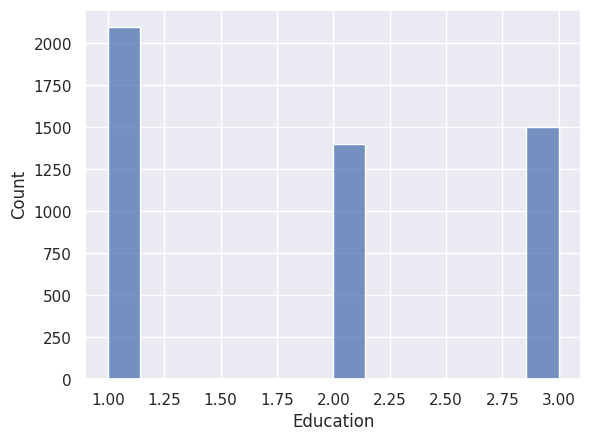

In [111]:
sns.histplot(data=loan_data,x="Education")
# More Undergrad loan customer, but Eduction is for the most part is evenly distributed for 2 and 3.

<Axes: xlabel='Age'>

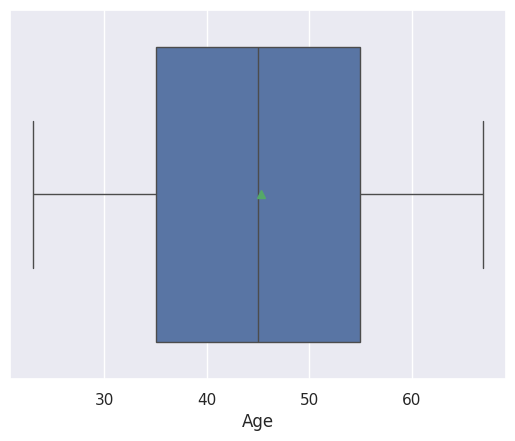

In [122]:
sns.boxplot(data=loan_data,x="Age",showmeans=True)
# Most cutomers tend to be interested in loans between 35 and 55 and past 55 less customers are interested in a loan.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [130]:
null_loans = loan_data.isnull().sum()
na_loans = loan_data.isna().sum()
print(null_loans)
print(na_loans)
print(f"There are {loan_data.duplicated().sum()} dupes")


Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64
There are 13 dupes


In [140]:
if 'ID' in loan_data.columns:
  loan_data = loan_data.drop(columns=['ID'])
if 'ZIPCode' in loan_data.columns:
  loan_data = loan_data.drop(columns=['ZIPCode'])
# copy for custering and Decision Tree
loan_cluster = loan_data.copy()
loan_decision_tree = loan_data.copy()

In [205]:
scaler = StandardScaler()
loan_cluster_scaled = scaler.fit_transform(loan_cluster)
loan_cluster_df = pd.DataFrame(loan_cluster_scaled, columns=loan_cluster.columns)
loan_cluster_df_start = loan_cluster_df.copy()

In [157]:
tsne = TSNE(n_components=2, n_jobs=-2, random_state=0,perplexity=45)
tsne_reduced_data = tsne.fit_transform(loan_cluster)
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"]))

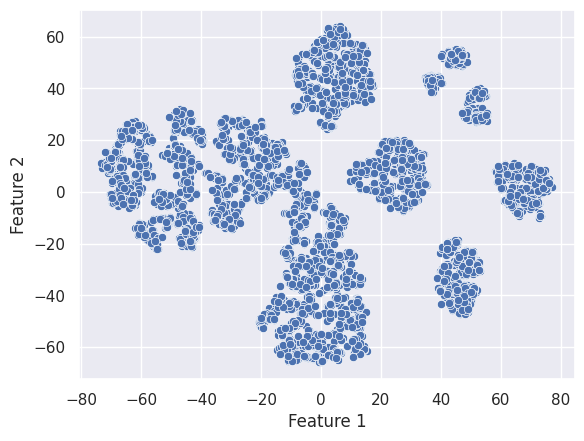

In [158]:

sns.scatterplot(data=tsne_2d_data, x="Feature 1", y="Feature 2");

KeyboardInterrupt: 

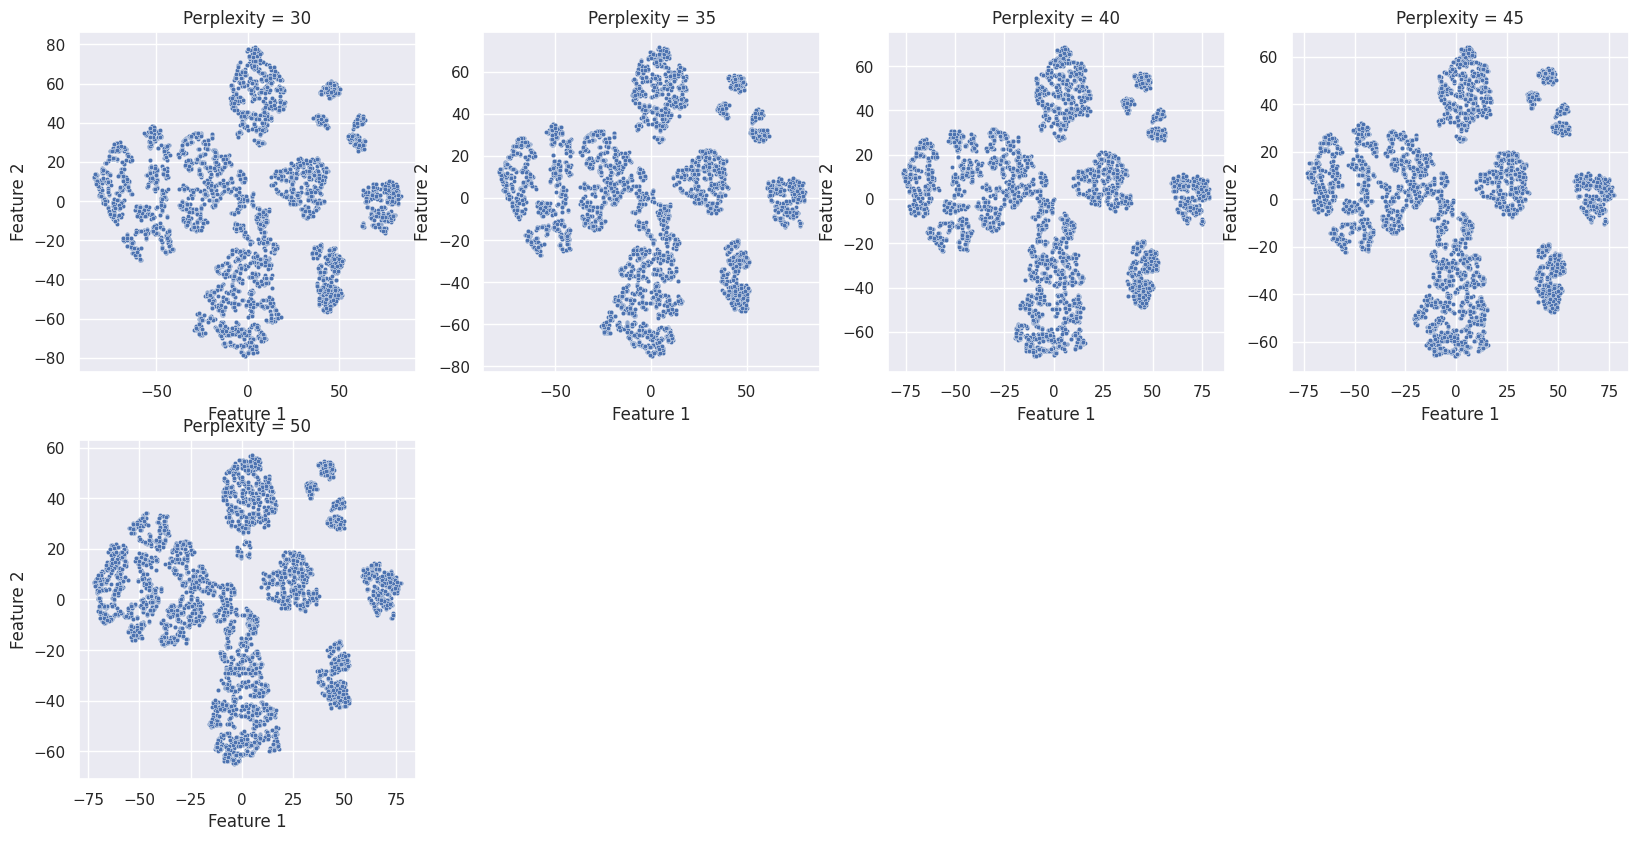

In [159]:
plt.figure(figsize=(20, 15))

perplexities = [30, 35, 40, 45, 50, 75]

for idx, p in enumerate(perplexities):
    tsne = TSNE(
        n_components=2,
        perplexity=p,
        random_state=0,
        n_jobs=2
    )

    embedding = tsne.fit_transform(loan_cluster)
    df = pd.DataFrame(embedding, columns=["Feature 1", "Feature 2"])

    plt.subplot(3, 4, idx + 1)
    sns.scatterplot(data=df, x="Feature 1", y="Feature 2", s=10)
    plt.title(f"Perplexity = {p}")

plt.tight_layout()
plt.show()


In [160]:
tsne = TSNE(n_components=3, n_jobs=-2, random_state=0, perplexity=50)
tsne_reduced_data = tsne.fit_transform(loan_cluster)
tsne_3d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2","Feature 3"]))

In [164]:
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3')
fig.show()

In [207]:
k_means_df = loan_cluster_df_start.copy()

In [208]:
# creating a copy of the original data
cluster_data = loan_cluster_df_start.copy()

# adding kmeans cluster labels to the dataframes
k_means_df["K_means_segments"] = kmeans.labels_
cluster_data["K_means_segments"] = kmeans.labels_
tsne_2d_data["K_means_segments"] = kmeans.labels_
tsne_3d_data["K_means_segments"] = kmeans.labels_

In [209]:
clusters = range(2, 11)
WCSS = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(k_means_df)
    prediction = model.predict(k_means_df)

    wcss = model.inertia_


    WCSS.append(wcss)

    print("Number of Clusters:", k, "\twcss:", wcss)

Number of Clusters: 2 	wcss: 53137.91471477828
Number of Clusters: 3 	wcss: 45371.46221362057
Number of Clusters: 4 	wcss: 41923.62735157218
Number of Clusters: 5 	wcss: 40346.53043952394
Number of Clusters: 6 	wcss: 38237.17309006904
Number of Clusters: 7 	wcss: 37159.29220660322
Number of Clusters: 8 	wcss: 32375.78254755846
Number of Clusters: 9 	wcss: 31109.072109210643
Number of Clusters: 10 	wcss: 29822.777992221785


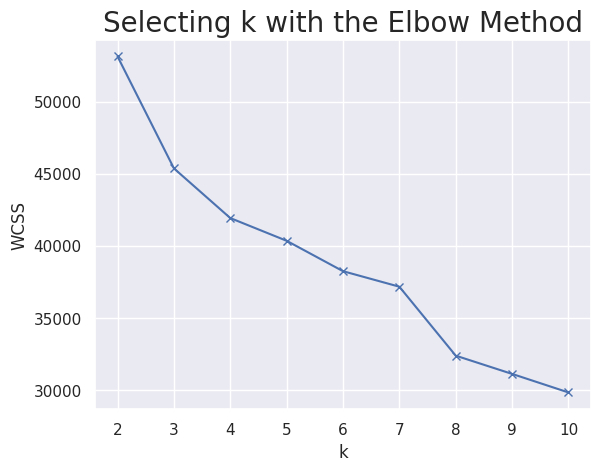

In [210]:
plt.plot(clusters,WCSS,"bx-")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

For n_clusters = 2, the silhouette score is 0.2485966955071301)
For n_clusters = 3, the silhouette score is 0.21067917545394566)
For n_clusters = 4, the silhouette score is 0.12879670273364)
For n_clusters = 5, the silhouette score is 0.1317771356532847)
For n_clusters = 6, the silhouette score is 0.1468551271476989)
For n_clusters = 7, the silhouette score is 0.15726744041117163)
For n_clusters = 8, the silhouette score is 0.14024777613477227)
For n_clusters = 9, the silhouette score is 0.13720596024906537)


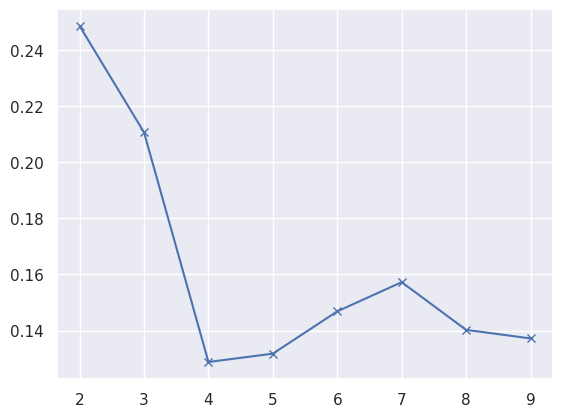

In [213]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    preds = clusterer.fit_predict((loan_cluster_scaled))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))
plt.plot(cluster_list, sil_score, "bx-")
plt.show()

In [203]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(loan_cluster_scaled)

KMeans(n_clusters=3, random_state=0)

In [215]:
# creating a copy of the original data
cluster_data = loan_cluster_df_start.copy()

# adding kmeans cluster labels to the dataframes
k_means_df["K_means_segments"] = kmeans.labels_
cluster_data["K_means_segments"] = kmeans.labels_
tsne_2d_data["K_means_segments"] = kmeans.labels_
tsne_3d_data["K_means_segments"] = kmeans.labels_

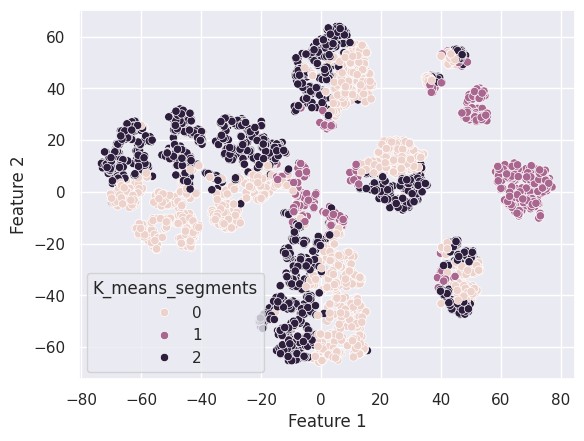

In [216]:
# visualizing the final cluster using t-SNE 2D
sns.scatterplot(data=tsne_2d_data, x='Feature 1', y='Feature 2', hue='K_means_segments');

In [180]:
# visualizing the final cluster using t-SNE 3D
# plotting a 3D scatterplot
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3',color='K_means_segments')
fig.show()

## Model Building

### Model Evaluation Criterion

*


### Model Building

## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___